-----
# **Sentiment Analysis Singapore Airlines Reviews**
----


# **Introduction**



Nama : Danisa Rahadian Abimanyu


# **Background**
Dalam era digital saat ini, platform e-tiket menjadi pilihan utama bagi konsumen untuk membeli berbagai produk dan layanan. Setiap hari, ribuan ulasan atau review dari pelanggan diterima oleh platform tersebut. Ulasan-ulasan ini mengandung informasi berharga mengenai kepuasan pelanggan, kualitas produk, dan pengalaman belanja secara keseluruhan. Namun, volume ulasan yang besar membuat proses analisis manual menjadi tidak efektif dan memakan waktu.

Proyek ini akan menghasilkan sebuah sistem analisis sentimen yang accuracy efektif sebesar 80% untuk ulasan pelanggan pada platform e-tiket. Selain itu, dengan target f1-score sebesar 80%, sistem ini akan lebih seimbang dalam menangani kasus ketidakseimbangan data antara ulasan positif dan negatif, memastikan bahwa perusahaan tidak hanya fokus pada akurasi, tetapi juga pada keseimbangan antara presisi dan recall. Dengan demikian, perusahaan dapat mengambil keputusan yang lebih tepat dan responsif terhadap kebutuhan pasar, sementara pelanggan mendapatkan manfaat dari peningkatan kualitas yang ditawarkan.

Berikut adalah penjelasan detail terkait dataset yang akan digunakan pada project ini:

| Nama Kolom         | Deskripsi                                                      |
|--------------------|----------------------------------------------------------------|
| `published_date`   | Tanggal dan waktu publikasi ulasan.                            |
| `published_platform` | Platform tempat ulasan diposting.                             |
| `rating`           | Peringkat kepuasan pelanggan, dari 1 (terendah) hingga 5 (tertinggi). |
| `type`             | Menentukan konten sebagai ulasan.                              |
| `text`             | Ulasan pelanggan yang mendetail.                          |
| `title`            | Ringkasan ulasan.                                              |
| `helpful_votes`    | Jumlah pengguna yang merasa ulasan ini membantu.               |


# **Import Libraries**

In [1]:
# Install Libraries
!pip install --upgrade "tensorflow<2.16" "tf-keras<2.16"

#Import Libraries

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional, Input
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical

#download library
nltk.download('punkt') #punctuation package
nltk.download('stopwords') #stopwords package
nltk.download('wordnet')


#warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **Data Loading**

Dataset ini diambil dari kaggle : https://www.kaggle.com/datasets/kanchana1990/singapore-airlines-reviews

Namun, sudah dilakukan download ke dalam google drive. Jadi kita akan load dataset tersebut dari google drive.

In [2]:
# import file from google colab

import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Selanjutnya kita read csv tersebut berdasarkan pathnya di file google drive.

In [3]:
# Read csv file
df = pd.read_csv('/content/drive/MyDrive/singapore_airlines_reviews.csv')

#print
df

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


In [4]:
# Cek tipe data dan informasi lainnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


Dari informasi di atas, kita dapat melihat bahwa ```published_date```, ```published_platform```, ```type```, ```text```, ```title``` bertipe data object, dan ```rating``` dan ```helpful_votes``` bertipe data integer. Terdapat missing value pada kolom ```title```, mari kita coba pastikan deteksi missing value dengan syntax ```df.isnull().sum()```

In [5]:
# Cek data yang null
df.loc[df['title'].isnull()]

,published_date,published_platform,rating,type,text,title,helpful_votes
3918,2019-09-01T04:18:02-04:00,Desktop,2,review,Very rude help desk of Singapore airlines at S...,NaN,1


Setelah kita melihat, ternyata pada index ke 3918 terdapat missing value. Coba kita lihat lebih detail narasi ulasannya.

In [6]:
# menampilkan rinci text index 3918
df.loc[3918, 'text']

'Very rude help desk of Singapore airlines at Sydney airport, experienced couple of times .Overall service is poor Food is not great'

Dilihat dari ulasannya, seharusnya sentimennya adalah negatif. Namun pada analisa lebih lanjutnya tidak perlu dilakukan handle pada missing value lebih lanjut pada kolom ```title```, karena kita tidak akan menggunakan kolom tersebut untuk digunakan di model training.

Kemudian kita lihat, apakah di dalam dataset terdapat data yang terduplikasi.

In [7]:
# Cek duplicate pada dataset
df.duplicated().sum()

0

Ternyata tidak terdapat duplicated data, jadi kita bisa melanjutkan ke tahap selanjutnya.

<Axes: xlabel='rating', ylabel='count'>

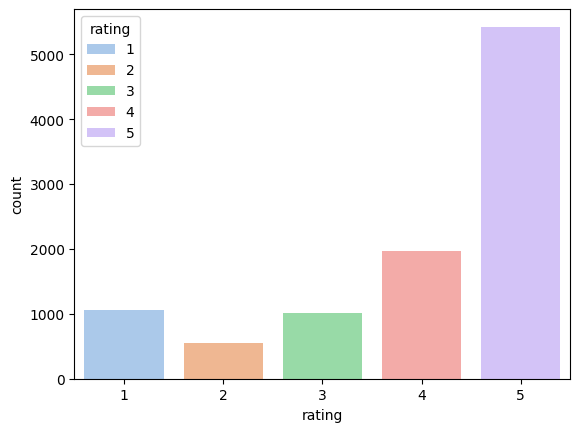

In [8]:
# Visualisasi distribusi rating
sns.countplot(x='rating', data=df, palette='pastel', hue='rating')

Kita melihat perbandingan unique rating, dimana nilai paling sedikit terdapat pada kelas rating 1 dan 2. Selanjutnya, kita akan mengubah kolom rating menjadi label, seperti yang akan dijelaskan di tabel berikut :

| Unique  Rating      | Label                                                                                          |
|--------------|----------------------------------------------------------------------------------------------------|
| 1          | negative                                                                            |
| 2       | negative                                               |
| 3       | netral                                                                       |
| 4       | positive                                                                       |
| 5       | positive                                                                       |

In [9]:
# Cek unique value kolom 'rating
df['rating'].unique()

array([3, 5, 1, 2, 4])

Terdapat 5 unique value :
- 1
- 2
- 3
- 4
- 5


In [10]:
# Mengubah unique value di kolom 'rating' menjadi label sentimen
for index, row in df.iterrows():
  #jika value = 1
  if row['rating'] == 1:
    df.loc[index, 'rating'] = 'negative'
  #jika value = 2
  elif row['rating'] == 2:
    df.loc[index, 'rating'] = 'negative'
  #jika value = 3
  elif row['rating'] == 3:
    df.loc[index, 'rating'] = 'netral'
  #jika value = 4
  elif row['rating'] == 4:
    df.loc[index, 'rating'] = 'positive'
  #jika value = 5
  elif row['rating'] == 5:
    df.loc[index, 'rating'] = 'positive'

In [11]:
# Cek unique value setelah diubah
df['rating'].unique()

array(['netral', 'positive', 'negative'], dtype=object)

# **Exploratory Data Analysis (Before Preprocessing)**

Disini coba saya jelaskan mengapa rating berangka 3 adalah netral.

In [12]:
df.head(100)

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,netral,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,positive,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,negative,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,positive,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,negative,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
95,2024-01-01T16:04:05-05:00,Desktop,negative,review,I travel on 29 December from Sri Amritsar to p...,Very bad experience,0
96,2023-12-31T13:48:28-05:00,Desktop,positive,review,I have been flying Singapore Airlines for 42 y...,"Impossible to talk to a human, website booking...",1
97,2023-12-31T08:06:25-05:00,Desktop,negative,review,We booked a trip on Singapore airlines in prem...,Awful experience with Singapore airlines,0
98,2023-12-28T12:27:51-05:00,Desktop,positive,review,I had a great experience on this airline from ...,Yeah Singapore Airlines!,0


Kita akan menggunakan data pada ```index 0``` untuk melihat lebih dalam, mengapa rating pada ulasan tersebut adalah 3, dan dianggap netral. Karena jika dilihat dalam bentuk dataframe tidak terbaca semua narasinya, maka kita akan menggunakan ``df.loc`` untuk melihat sample.

In [13]:
# menampilkan rinci text index 0 (netral)
print('Netral Riview')

print('-'*50)
df.loc[0, 'text']

Netral Riview
--------------------------------------------------


"We used this airline to go from Singapore to London Heathrow. We had issues with tickets as they cancelled one of the tickets and trying to get it sorted cost a lot of money due to roaming charges for the lengthy phone calls which were needed to get the ticket reinstated and them trying to charge varying amounts to resolve it. This was a very poor service. \n\nWe got to the airport and had to check in at the desk due to this issue which meant online check in couldn't be done. We were in premium economy which was spacious, two seats on either side of the plane and 3 seats in the middle. The plane seemed relatively new but not brand new. Legroom was good, seats were wider and had bigger arm rest in between the two seats which had the fold away tray tables in. There was a good choice of movies and other things such as TV shows, games etc. The food was ok, didn't seem to be much different from economy standard. The flight crew seemed friendly enough. They didn't really go up and down the 

Kita melihat dari segi contoh sample ulasan diatas, bahwasanya dia menjelaskan kekurangan dan kelebihan pada pelayanannya. Dari penjabaran teks diatas saya asumsikan bahwa rating 3 adalah netral.

Selanjutnya, saya ingin melihat value yang ulasannya adalah positive. Disini saya akan memanggil dari sampe ```index ke 6``` dari dataset untuk dilihat ulasannya, apakah sudah sesuai dengan labelnya.

In [14]:
# menampilkan rinci text index 6 (positive)
print('Positive Riview')

print('-'*50)
df.loc[6, 'text']

Positive Riview
--------------------------------------------------


'This was a fascinating experience. As I sat into my seat, the stewardess offered me a warm towel and I felt very very welcomed. They treat you too well haha. The seats were comfortable. They even gave me a teddy bear haha idk why.'

Dapat kita simpulkan bahwa teks yang positive sudah benar sesuai labelnya, menyesuaikan dengan ulasan yang diberikan dari client. Selanjutnya coba kita quick riview untuk data yang valuenya negative.

In [15]:
# menampilkan rinci text index 97 (negative)
print('Negative Riview')

print('-'*50)
df.loc[97, 'text']

Negative Riview
--------------------------------------------------


"We booked a trip on Singapore airlines in premium economy.  This was for their 19 hour flight to Singapore.  It is a really long flight so I called to see if we could upgrade to Business class.  I called on two different occasions and was told by two different agents that we could upgrade for a certain dollar amount.  They upgraded us AND charged my credit card for the agreed amount.  I thought we were all set.  I then got an 'urgent' email from Singapore airlines saying that I needed to call them.  I called them and was told that on our outbound flight business class was sold out BUT Singapore airlines wanted to honor their commitment to upgrading us so they upgraded us to first class on the outbound flight and business class on the return flight.  Again, I thought we were all set.  Then I got a call from Jason Chang, employee number 00520, one of the supervisors, and I was told that the person I talked to incorrectly upgraded me and didn't charge the correct amount.  He told me I co

Dapat kita simpulkan dari ulasan di atas, bahwa label sudah sesuai dengan ulasan yang diberikan dari client (keluhan), mengarah ke pesan yang negative.

## **Visualization WordCloud**

Kita akan melihat, dari text ulasan kata mana yang paling banyak dipakai oleh pemberi ulasan.

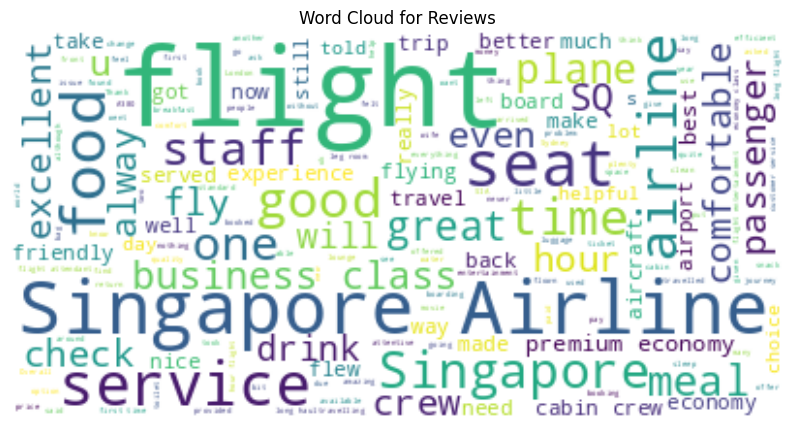

In [16]:
# Visualisasi wordcloud
text = ' '.join(review for review in df['text'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

Dari wordcloud, kita melihat banyak kata yang sering digunakan oleh client untuk memberi ulasan adalah kata berikut :    
- flight
- Singapore Airline
- airline
- service
- good
- food
- Singapore
- seat
- etc.

In [17]:
# Menghitung count setiap kategori tweet
print(df['rating'].value_counts())

rating
positive    7391
negative    1600
netral      1009
Name: count, dtype: int64


<Axes: xlabel='rating', ylabel='count'>

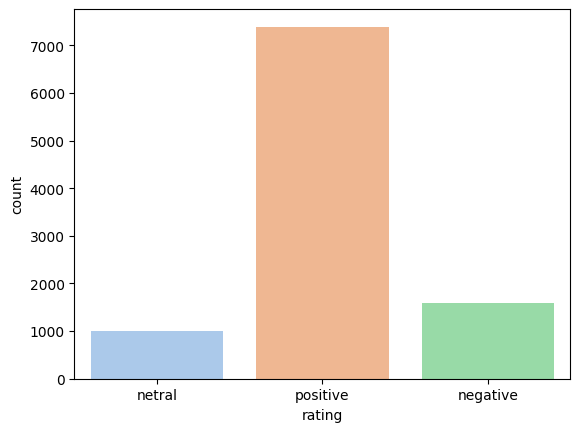

In [18]:
# membuat bar chart menghitung value counts kolom `rating`
sns.countplot(x='rating', data=df, palette='pastel', hue='rating')

Persebaran data yang didapatkan dari hasil target. Kita akan menghandle hal tersebut saat sudah dilakukan preprocessing saja. Selanjutnya kita coba lihat didalam setiap ulasan terdapat berapa banyak kalimat didalamnya.

In [19]:
# Menambahkan kolom baru yang menyimpan jumlah kata dalam setiap text
df['sentences_length'] = df['text'].apply(lambda text: len(nltk.sent_tokenize(text)))

df.sample(20)

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length
5867,2019-04-16T21:50:26-04:00,Desktop,positive,review,We travelled from Colombo to Brisbane with a s...,"Very comfortable, did not feel the long journey",0,2
3111,2019-10-25T09:54:11-04:00,Mobile,positive,review,I had the opportunity to fly from Los Angeles ...,Great Airline,1,12
5968,2019-04-09T15:51:15-04:00,Desktop,positive,review,Quick trip to do some research in Botanic Gard...,Quick Trip to Singapore,2,3
3387,2019-09-30T15:04:23-04:00,Mobile,positive,review,Polite crew who came to greet my husband perso...,Great service,1,4
6100,2019-04-02T14:56:41-04:00,Desktop,positive,review,"As usual a very nice flight. Good service, ple...",Great and Consistent,2,3
6601,2019-02-26T17:20:10-05:00,Mobile,netral,review,Seated a third of the way down the aircraft. N...,Make sure you eat before you go!?,0,6
9137,2018-09-18T11:41:06-04:00,Desktop,positive,review,I flew IAH/Manchester/Singapore/Denpasar and t...,Awesome Singapore service,0,16
6071,2019-04-04T16:04:16-04:00,Mobile,positive,review,I am from the UK live in Austin Texas since Si...,The best,1,1
7067,2019-01-24T15:46:18-05:00,Desktop,positive,review,Singapore Airline is no doubt one of the best ...,"Same superior service, except on an older plane",0,7
1383,2020-03-29T09:08:24-04:00,Desktop,positive,review,Right from check in where we were greeted with...,Great experience.. One of the best airlines in...,3,5


In [20]:
# Menambahkan kolom baru yang menyimpan jumlah kata dalam setiap text
df['word_length'] = df['text'].apply(lambda text: len(nltk.word_tokenize(text)))

df.sample(20)

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length,word_length
3601,2019-09-12T18:43:18-04:00,Desktop,netral,review,Flying internationally several times a year I ...,For Canberra travellers,2,3,109
5703,2019-04-28T14:56:28-04:00,Desktop,positive,review,Flight crew were kind and attentive even servi...,Excellent flight,0,1,20
2440,2019-12-09T23:25:01-05:00,Desktop,positive,review,I enjoyed this flight. I have long legs and f...,Enjoyed this Airline,1,6,53
5363,2019-05-24T01:26:15-04:00,Desktop,positive,review,This was the second part of journey having tra...,Excellent service,0,5,61
5756,2019-04-24T15:54:38-04:00,Mobile,positive,review,Board the flight 30 mins before 12pm. The flig...,YGS trip,10,6,58
6237,2019-03-22T17:46:28-04:00,Mobile,positive,review,SQ offers better service in premium economy co...,better than competitor,1,4,44
7739,2018-12-17T16:05:39-05:00,Mobile,positive,review,I fly quite a bit to Europe. I have flown to M...,"Best airline, Singapore!",0,11,137
3138,2019-10-22T03:05:50-04:00,Desktop,negative,review,I traveled with this airline numerous times an...,Worst airline,2,12,190
1759,2020-02-24T00:24:26-05:00,Desktop,positive,review,Its a long trip so we booked business class wi...,Brisbane Trip,1,9,133
6386,2019-03-10T15:04:39-04:00,Desktop,positive,review,Singapore airlines is a great airline to trave...,Great airline,1,2,23


In [21]:
# Print Max and Average sentences_length
print('Max kalimat pada ulasan adalah : ', df['sentences_length'].max())
print('Mean kalimat pada ulasan adalah : ', df['sentences_length'].mean())

print ('-'* 40)
# Print Max and Average word_lenth
print('Max kata pada ulasan adalah : ', df['word_length'].max())
print('Mean kata pada ulasan adalah : ', df['word_length'].mean())

Max kalimat pada ulasan adalah :  165
Mean kalimat pada ulasan adalah :  6.297
----------------------------------------
Max kata pada ulasan adalah :  3501
Mean kata pada ulasan adalah :  110.46


Dari output diatas, berdasarkan eksplorasi di dataset sebelum di preprocessing terdapat :
- Maksimal kalimat pada ulasan sebesar 165 dan rata-rata kalimatnya sebesar 6.2
- Maksimal kata pada ulasan sebanyak 3501 dan rata-rata pada kata di ulasan sebesar 110.4

Kita akan membandingkan nantinya dari hasil ekplorasi sebelum text preprocessing ini untuk dibandingkan dengan yang sebelum dilakukan text preprocessing.

# **Feature Engineering**

## **Preprocessing**

Pada tahapan preprocessing, yang akan kita terapkan adalah :

1. Stopwords Handling
2. Case Folding :  

  Case folding dilakukan setelah melihat gambaran ulasan, masih terdapat banyak text yang belum lower case/kapitalisasi. Maka dari itu kita akan melakukan tahapan case folding ini untuk membuat semua text menjadi lower case.

3. Remove Numbers :    

  Seperti yang kita lihat pada EDA, terdapat ulasan yang terdapat angka, maka dari itu kita akan lakukan handling number.

4. Remove Punctuation :    

  Kita melihat pada contoh narasi terdapat punctuation seperti **#$.'\n** dan lain-lain. Jadi akan lebih baik jika kita melakukan handling untuk menghapus punctuation tersebut.

5. Remove Whitespace :     

  Untuk penghilangan spasi yang tidak terlihat akan lebih baik jika digunakan, jadi ketika ada kemungkinan dari sekian banyak data yang ternyata ada whitespace, kita sudah melakukan handling whitespace.

6. Lemmatization :    

  Di case ini saya akan menggunakan lemmatization dibandingkan stemming, karena lebih bisa mendeteksi dengan baik dan juga menggunakan bahasa inggris, pada dataset terdapat v2/v+ing/ dan past tense, seperti **flew, used, called, flying, using**, jadi dari nltk sendiri sudah lengkap untuk relevansi bahasanya di bahasa inggris.

7. Word Tokenization :    

  Dalam word tokenization kita akan melakukan pemisahan kata-perkata, dengan rasionalitas bahwa nantinya model dapat dengan mudah mendeteksi sentimen berdasarkan kata yang digunakan.

Pertama-tama, kita masukkan stopwords, disini saya menambahkan beberapa stopwords tambahan selain yang disediakan oleh NLTK library.

In [22]:
# Menambahkan stopwords
add_stopwords = ['to', 'I','the','a','my','and','i', 'you', 'is', 'for', 'in', 'of',
 'it', 'on', 'have', 'that', 'me', 'so', 'with', 'be', 'but',
 'at', 'was', 'just', 'I`m', 'not', 'get', 'all', 'this', 'are',
 'out', 'like', 'day', 'up', 'go', 'your', 'good', 'got', 'from',
 'do', 'going', 'no', 'now',  'work', 'will', 'about',
 'one', 'really', 'it`s', 'u', 'don`t', 'some', 'know', 'see', 'can',
 'too', 'had', 'am', 'back', '&', 'time', 'what', 'its', 'want', 'we',
 'new', 'as', 'im', 'think', 'can`t', 'if', 'when', 'an', 'more',
 'still', 'today', 'miss', 'has', 'they', 'much', 'there', 'last',
 'need', 'My', 'how', 'been', 'home', 'lol', 'off', 'Just', 'feel',
 'night', 'i`m', 'her', 'would', 'The', 'sq', 've', 'le', 'hr', 'pre', 'ca', 'th', 'b', 'uk', 'sat', 'sg', 'k', 'sfo', 'usb', 'cm', 'san', 'ft', 'hkg', 'veg', 'usd', 'rd', 'la',
'bid', 'tag', 'usa', 'york', 'rang', 'ho', 'yr', 'fuss', 'los', 'bne', 'nap', 'hang', 'tad', 'wi', 'fi', 'sum', 'de', 'dp', 'fro', 'koh', 'samui', 'ana', 'sogi', 'prem',
'aud', 'act', 'mnl', 'ie', 'klm', 'comb', 'ny', 'opt', 'au', 'en', 'eg', 'hub', 'yo', 'hung','sia', 'hop', 'com', 'nov', 'bc', 'cairn', 'dim', 'oct', 'bom', 'dhaka', 'cdg', 'nrt', 'cph' , 'na', 'log', 'kul', 'lh', 'w', 'ive', 'qf', 'shoe', 'tap', 'jam', 'lip', 'wan', 'oz', 'tho', 'siem', 'r', 'eve', 'melb', 'da', 'haha', 'airnz', 'coz', 'akl', 'utmost', 'gourmet', 'apps', 'mb', 'cx',  'dom', 'inr', 'pls', 'yum', 'bang', 'haagen', 'kix', 'sep', 'phee', 'rip', 'hip', 'un', 'warn', 'wee', 'z', 'ek', 'pic', 'sm', 'xmas', 'davao', 'penh', 'pcr', 'krug', 'pill', 'mar', 'ml', 'omg', 'def', 'jnb', 'kathmandu', 'pnr', 'emma', 'pudong', 'yangon', 'nang', 'qr', 'lol', 'ff', 'soo', 'so', 'vip', 'mai', 'ala', 'dxb', 'in', 'dme', 'pram', 'era', 'sim', 'bug', 'chan', 'bump', 'bent', 'pea', 'leo', 'sgn', 'amp', 'ed', 'ptv', 'dazs', 'dull', 'thr', 'aft','al', 'mad', 'pan', 'eu', 'mere', 'icing', 'danang', 'vn', 'bcn', 'singapur', 'guru', 'abit', 'fukuoka', 'wa', 'eau' , 'hoon', 'nicole', 'ham', 'ifs', 'perrier', 'sevice', 'convince', 'ref', 'easyjet', 'zrh', 'fond', 'ldn', 'ons', 'dire', 'hcmc', 'fr', 'toe', 'pond', 'ur', 'afghan', 'shenzen', 'hv', 'hkd', 'offs', 'icn', 'q', 'gaulle', 'uae', 'sooo', 'si', 'chianti', 'bengaluru', 'yeah', 'gps', 'nine', 'inc', 'jhb', 'madam', 'ban', 'signage', 'cheng', 'twg', 'alway', 'arn', 'swivel', 'krisshop', 'ya', 'ma', 'swa', 'chc', 'hyd', 'peculiar', 'oj', 'osl', 'prop', 'rhapsody', 'iam', 'wong', 'doona', 'gst', 'concoction', 'nj', 'doughy', 'fav', 'hum', 'stern', 'revamp', 'nzd', 'blunt', 'gon', 'int', 'bout', 'bento', 'hnd', 'ingham', 'bwn', 'cuz', 'jkt', 'yang', 'dr', 'mass', 'snag', 'piss', 'irate', 'adl', 'gel', 'econony', 'adjoining', 'rattle', 'chor', 'hide', 'hkt', 'amex', 'kim', 'goreng', 'singapre', 'ling', 'ap', 'damp', 'gastro', 'boss', 'temp', 'midst', 'gatwick', 'slop', 'krabi', 'sh', 'vi', 'ha', 'cmb', 'bak', 'inn', 'ful', 'ion','tbh', 'basinet', 'cab', 'andrea', 'welfare', 'kochi', 'lump', 'ashton', 'yatra', 'wotif', 'ent', 'an', 'ca', 'sang', 'ply', 'snug', 'rt', 'tongs', 'allways', 'grub', 'reckon', 'can', 'pr', 'ovo', 'maa', 'koi', 'sharifah', 'ab', 'bogus', 'nigh', 'sn', 'kat', 'david', 'john', 'savvy', 'muesli', 'ind', 'skywalk', 'imo', 'sqs', 'ng', 'teng', 'brat', 'mle', 'lye', 'iata', 'kee', 'spinal', 'hmmmm','yep', 'shin', 'gaffa' , 'chai', 'med', 'coccyx', 'eur', 'jean', 'agian', 'mee', 'kapoor', 'fog', 'sebastian', 'lingus', 'nhat', 'li', 'qi', 'saga', 'tsa', 'hagen', 'jasmine', 'ah', 'chunk', 'kebaya', 'fot', 'poc', ]

In [23]:
# Stopwords defined
stpwds_eng = list(set(stopwords.words('english')))
stpwds_eng.append(add_stopwords)

Kemudian memasukkan tahapan pre-processing langsung kedalam satu fungsi, fungsi ini akan mencakup tahapan-tahapan pre-processing umum seperti pembersihan teks, tokenisasi, penghilangan stopwords, dan stemming atau lemmatization. Dengan memasukkan tahapan ini ke dalam satu fungsi, kita dapat mengotomatisasi proses dan membuatnya lebih efisien.

In [24]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  '''
  Fungsi ini berguna untuk memproses case folding, mention, hastag, lemmatization, stopwords, dan tokenisasi
  '''
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ", text)

  # Remove '
  text = re.sub(r"'s\b","", text)

  # Remove Numbers
  text = re.sub(r"\d+", " ", text)

  # Remove Punctuation
  text = re.sub(r"[^\w\s]", " ", text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Delete word yang kemuculannya hanya 2 kata
  text = re.sub(r"\b\w{1,2}\b", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Skema: token dulu/split word -> stopwords
  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_eng]

  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

Setelah dilakukan pre-processing, coba kita lihat dengan menambahkan kolom baru bernama ```text_processed``` untuk melihat dan memastikan hasil yang sudah dilakukan pre-processing.

In [25]:
# Membuat copy dari data yang sudah di preprocessing
df_processed = df.copy()

# Menggunakan data yang sudah di preprocessing di apply pada df_processed
df_processed['text_processed'] = df_processed['text'].apply(text_preprocessing)

# Print
df_processed.head()

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length,word_length,text_processed
0,2024-03-12T14:41:14-04:00,Desktop,netral,review,We used this airline to go from Singapore to L...,Ok,0,14,276,used airline singapore london heathrow issue t...
1,2024-03-11T19:39:13-04:00,Desktop,positive,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,47,925,service singapore airline suite class nothing ...
2,2024-03-11T12:20:23-04:00,Desktop,negative,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,6,88,booked paid received email confirmation extra ...
3,2024-03-11T07:12:27-04:00,Desktop,positive,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,3,28,best airline world seat food service brilliant...
4,2024-03-10T05:34:18-04:00,Desktop,negative,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,7,112,premium economy seating singapore airline narr...


Data sudah berhasil dilakukan pre-processing, kita dapat melihat pada kolom text_processed di sebelah kanan. Selanjutnya kita akan melakukan EDA setelah dilakukan pre-processing.

### **Exploratory Data Text After Pre-processing**

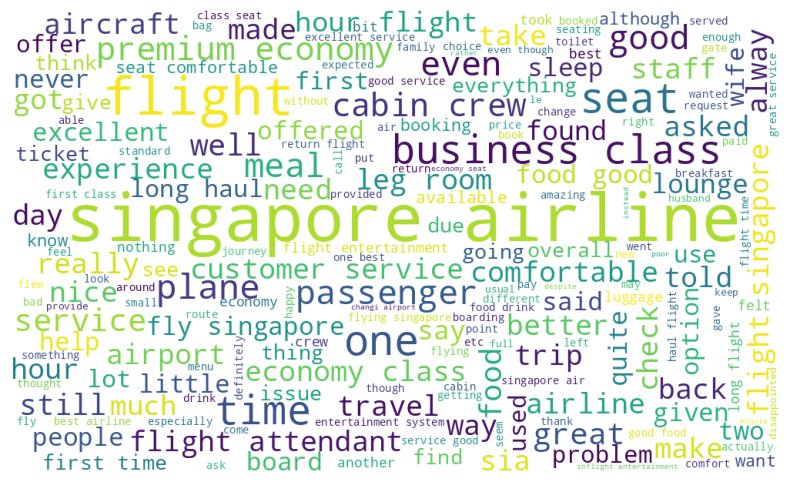

[('flight', 14858), ('singapore', 11865), ('airline', 11560), ('service', 7315), ('seat', 6818), ('food', 5717), ('good', 5326), ('time', 4596), ('economy', 3614), ('class', 3547), ('staff', 3337), ('crew', 3077), ('meal', 3041), ('one', 2966), ('great', 2953), ('would', 2755), ('hour', 2711), ('business', 2518), ('comfortable', 2284), ('cabin', 2214), ('experience', 2211), ('fly', 2150), ('plane', 2098), ('get', 2085), ('always', 2081), ('entertainment', 2031), ('first', 2022), ('excellent', 1909), ('even', 1890), ('leg', 1874), ('back', 1843), ('best', 1815), ('passenger', 1807), ('also', 1775), ('long', 1744), ('well', 1612), ('could', 1605), ('like', 1593), ('check', 1589), ('flying', 1524), ('air', 1523), ('premium', 1519), ('much', 1515), ('airport', 1507), ('friendly', 1506), ('trip', 1475), ('drink', 1427), ('better', 1411), ('really', 1407), ('way', 1378), ('new', 1270), ('travel', 1239), ('customer', 1207), ('choice', 1181), ('year', 1156), ('flew', 1136), ('room', 1123), ('d

In [26]:
# Worcloud
all_words_after = ' '.join(word for word in df_processed['text_processed'])

wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white').generate(all_words_after)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Tokenisasi kata-kata dalam string besar
words_after = all_words_after.split()
word_freq_after = Counter(words_after)

# Menampilkan kata paling umum
print(word_freq_after.most_common())

Dapat kita lihat dari visualisasi di atas, bahwa 5 kata yang paling banyak keluar adalah ```flight``` dengan 14.858 kata, kemudian kata ```singapore``` dengan kemunculan sebesar 11.865 kata, ```airline``` dengan jumlah 11.560 data, ```service``` dengan jumlah kata 7.315, terakhir ```seat``` dengan 6.818 kata. Langkah selanjutnya adalah menambahkan kolom baru berdasarkan ```sentencess``` dan ```word``` untuk kita lihat, dari segi kalimat sebanyak apa rata-ratanya setelah dilakukan pre-processing, begitu juga dengan kata.

In [27]:
# Menambahkan kolom baru yang menyimpan jumlah kalimat dalam setiap text
df_processed['sentences_length_processed'] = df_processed['text_processed'].apply(lambda text: len(nltk.sent_tokenize(text)))

df_processed.sample(20)

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length,word_length,text_processed,sentences_length_processed
7817,2018-12-17T12:02:53-05:00,Desktop,positive,review,We flew from Milano to Singapore then onto Aus...,Excellent flight and good service,0,4,39,flew milano singapore onto australia selected ...,1
9582,2018-09-10T05:56:20-04:00,Desktop,positive,review,Its my first time to travel through airplane a...,"""A GREAT WAY TO FLY""",0,2,47,first time travel airplane singapore airline f...,1
292,2023-07-18T15:49:44-04:00,Desktop,negative,review,We booked return business class flights to Eur...,Why can't Singapore Airlines act in good faith...,1,23,434,booked return business class flight europe fle...,1
5554,2019-05-08T19:31:21-04:00,Desktop,netral,review,Loosing their edge against Emirates especially...,Disappointing food,1,2,23,loosing edge emirate especially food new aircr...,1
1683,2020-03-05T08:39:45-05:00,Desktop,positive,review,The difference between Singapore Airlines and ...,A big difference.,1,10,145,difference singapore airline silk air chalk ch...,1
6382,2019-03-11T01:30:52-04:00,Desktop,positive,review,"This was my first time on a 380, considering t...",380 Airbus,2,5,109,first time considering size aircraft much leg ...,1
8173,2018-11-20T08:25:25-05:00,Desktop,positive,review,"the extra room in the seats was very good, onl...",Premium economy,0,3,83,extra room seat good issue whole economy walk ...,1
1430,2020-03-18T15:29:57-04:00,Desktop,positive,review,"Everything about Singapore Airlines, in our ex...",Only way to travel...,2,8,198,everything singapore airline experience faulte...,1
5815,2019-04-21T00:12:11-04:00,Mobile,positive,review,Flew SQ288 and was instantly impressed. This i...,Another wonderful flight,12,5,120,flew instantly impressed first time seat flipp...,1
2911,2019-11-15T13:56:08-05:00,Desktop,positive,review,Best food I have ever had on an flight. This c...,Usual economy class woes.,2,3,32,best food ever flight combined drink entertain...,1


In [28]:
# Menambahkan kolom baru yang menyimpan jumlah kata dalam setiap tweet
df_processed['word_length_processed'] = df_processed['text_processed'].apply(lambda text: len(nltk.word_tokenize(text)))

df_processed.sample(20)

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length,word_length,text_processed,sentences_length_processed,word_length_processed
6415,2019-03-07T22:10:14-05:00,Desktop,negative,review,Did premium economy recently to and from Singa...,"Premium economy , poor value, poor service",3,7,65,premium economy recently singapore economy foo...,1,34
2413,2019-12-10T04:49:49-05:00,Mobile,positive,review,We fly to Singapore every September for the F1...,Singapore Airlines really are the best,1,3,57,fly singapore every september honestly fly any...,1,28
4027,2019-08-21T10:21:21-04:00,Desktop,positive,review,Its the first time I have flown Singapore Airl...,Best service !,2,6,129,first time flown singapore airline actually bl...,1,55
5578,2019-05-07T20:03:50-04:00,Desktop,positive,review,I recently (April/May 2019) travelled long-hau...,"Superb Service, kid friendly",0,4,126,recently april may travelled long haul melbour...,1,61
5670,2019-05-01T12:47:49-04:00,Desktop,positive,review,This was my wife and my first international tr...,Great Airline,1,6,58,wife first international trip truly amazing pl...,1,27
6755,2019-02-21T04:24:11-05:00,Desktop,positive,review,PAL was delayed and we were offered a seat in ...,Polite crews!,1,3,25,pal delayed offered seat singapore airline cre...,1,12
6070,2019-04-04T16:20:27-04:00,Desktop,positive,review,"Enjoyed my flight thoroughly, great airline fo...",amazing flight with impeccable service,0,2,28,enjoyed flight thoroughly great airline food a...,1,13
809,2022-09-14T21:11:21-04:00,Desktop,negative,review,Singapore Airlines call center double charged ...,Terrible,2,7,92,singapore airline call center double charged d...,1,44
2423,2019-12-10T01:57:42-05:00,Mobile,positive,review,Flight Service was great experience even for m...,Best Transit Flight,2,1,70,flight service great experience even daughter ...,1,38
1477,2020-03-13T07:01:53-04:00,Desktop,positive,review,Had a great overnight flight from Sydney to Ne...,Fantastic flights - great service,1,4,74,great overnight flight sydney new delhi hour s...,1,36


In [29]:
# Print Max and Average sentences_length_processed
print('Max kalimat pada setelah preprocessing adalah : ', df_processed['sentences_length_processed'].max())
# Calculate the average length of the processed text
print('Mean kalimat pada setelah preprocessing adalah : ', df_processed['sentences_length_processed'].mean())

print ('-'* 40)
# Print Max and Average word_lenth
print('Max kata pada setelah preprocessing adalah : ', df_processed['word_length_processed'].max())
print('Mean kata pada setelah preprocessing adalah : ', df_processed['word_length_processed'].mean())

Max kalimat pada setelah preprocessing adalah :  1
Mean kalimat pada setelah preprocessing adalah :  1.0
----------------------------------------
Max kata pada setelah preprocessing adalah :  1688
Mean kata pada setelah preprocessing adalah :  49.8169


Perbandingan hasil setelah dilakukan teks preprocessing dapat dilihat pada tabel berikut :   


| Target | Sebelum | Sesudah |
|---|---|---|
| Max Kalimat | 165 | 1 |
| Rata-rata Kalimat | 6.2 | 1 |
| Max Kata | 3501 | 1688 |
| Rata-rata Kata | 110.4 | 49.8 |

Kita melihat bahwa data sudah berkurang dari yang sebelum dilakukan pre-processing. Selanjutnya akan kita lakukan training pada model. Namun sebelumnya kita nanti akan menggunakan kolom ```rating``` sebagai target. Maka dari itu kita ubah dulu target tersebut ke dalam bentuk numerical dengan ketentuan ```0 == Negative, 1 == Netral, 2 == Positive.```

In [30]:
# Change Target into Number

df_processed['label'] = df_processed['rating'].replace({'negative' : 0, 'netral' : 1, 'positive' : 2})

# Check dataframe
df_processed

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length,word_length,text_processed,sentences_length_processed,word_length_processed,label
0,2024-03-12T14:41:14-04:00,Desktop,netral,review,We used this airline to go from Singapore to L...,Ok,0,14,276,used airline singapore london heathrow issue t...,1,123,1
1,2024-03-11T19:39:13-04:00,Desktop,positive,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,47,925,service singapore airline suite class nothing ...,1,419,2
2,2024-03-11T12:20:23-04:00,Desktop,negative,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,6,88,booked paid received email confirmation extra ...,1,43,0
3,2024-03-11T07:12:27-04:00,Desktop,positive,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,3,28,best airline world seat food service brilliant...,1,14,2
4,2024-03-10T05:34:18-04:00,Desktop,negative,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,7,112,premium economy seating singapore airline narr...,1,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,positive,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,1,36,first part done singapore airline acceptable c...,1,21,2
9996,2018-08-05T22:50:29-04:00,Mobile,positive,review,And again a great Flight with Singapore Air. G...,Best Airline,1,3,29,great flight singapore air great unique servic...,1,16,2
9997,2018-08-05T22:47:06-04:00,Desktop,positive,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,5,65,flew business class frankfurt via singapore br...,1,33,2
9998,2018-08-05T20:32:03-04:00,Desktop,positive,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2,4,76,always aircraft spotlessly presented boarding ...,1,31,2


Kita akan menghapus kolom ```sentence_length_processed dan word_length_processed```,agar tidak mengganggu pemahaman ``sequential data``, dimana akan kebingungan jika kolom tidak sesuai alurnya. Jadi kita akan melakukan drop kolom tersebut karena data tersebut hanya untuk EDA setelah dilakukan pre-processing saja.

In [31]:
# Hapus sentence_length_processed dan word_length_processed
df_processed = df_processed.drop(columns=['sentences_length_processed', 'word_length_processed'])

# Check dataframe
df_processed

,published_date,published_platform,rating,type,text,title,helpful_votes,sentences_length,word_length,text_processed,label
0,2024-03-12T14:41:14-04:00,Desktop,netral,review,We used this airline to go from Singapore to L...,Ok,0,14,276,used airline singapore london heathrow issue t...,1
1,2024-03-11T19:39:13-04:00,Desktop,positive,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0,47,925,service singapore airline suite class nothing ...,2
2,2024-03-11T12:20:23-04:00,Desktop,negative,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0,6,88,booked paid received email confirmation extra ...,0
3,2024-03-11T07:12:27-04:00,Desktop,positive,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0,3,28,best airline world seat food service brilliant...,2
4,2024-03-10T05:34:18-04:00,Desktop,negative,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0,7,112,premium economy seating singapore airline narr...,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,positive,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1,1,36,first part done singapore airline acceptable c...,2
9996,2018-08-05T22:50:29-04:00,Mobile,positive,review,And again a great Flight with Singapore Air. G...,Best Airline,1,3,29,great flight singapore air great unique servic...,2
9997,2018-08-05T22:47:06-04:00,Desktop,positive,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1,5,65,flew business class frankfurt via singapore br...,2
9998,2018-08-05T20:32:03-04:00,Desktop,positive,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2,4,76,always aircraft spotlessly presented boarding ...,2


Kita dapat melihat bahwa pada kolom paling kanan sudah sesuai untuk fitur yang akan kita gunakan dan targetnya. Selanjutnya akan kita lanjutkan ke tahap training model.

In [32]:
# Target Distribution

df_processed['label'].value_counts()

,count
label,
2,7391
0,1600
1,1009


### **Split X (feature) dan Y(target)**

Selanjutnya adalah split train-set, val-set dan test-set. Train_val-set menggunakan 85% data sedangkan Test-set menggunakan 15% data. Kemudian Train_val-set akan di-split lagi dengan proporsi 85% data Train-set dan 15% data Val-set.

In [33]:
# df_processed Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df_processed.text_processed,
                                                    df_processed.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df_processed.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.15,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (7225,)
Val Size   :  (1275,)
Test Size  :  (1500,)


Kemudian mengubah target menggunakan One-Hot Encoding untuk Klasifikasi Multiclass. Dalam kasus ini, setiap kelas (netral, positif, negatif) akan direpresentasikan sebagai vektor biner dengan panjang 3, di mana setiap kelas memiliki 1 di posisinya dan 0 di tempat lain. Contoh:

- Netral: [1, 0, 0]  

- Positif: [0, 1, 0]  

- Negatif: [0, 0, 1]

Banyak model klasifikasi Neural Network membutuhkan target dalam bentuk one-hot encoded untuk tugas klasifikasi multikelas, terutama dalam konteks menggunakan fungsi aktivasi softmax di lapisan output.

In [34]:
# Change Target to One Hot Encoding

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [35]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<7225x13443 sparse matrix of type '<class 'numpy.int64'>'
	with 293295 stored elements in Compressed Sparse Row format>

Matriks ini memiliki 7.225 baris dan 13.443 kolom.

In [36]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  13443
Maximum Sentence Length :  1149 tokens


## **Text Vectorization**
Selanjutnya adalah tokenization untuk persiapan layer vectorization dan embedding.

In [37]:
# Text Vectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [38]:
# Example Result

## Document example
print('Document example')
print(df_processed.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df_processed.text_processed[0]]))
print('Vector size : ', text_vectorization([df_processed.text_processed[0]]).shape)

Document example
used airline singapore london heathrow issue ticket cancelled one ticket trying get sorted cost lot money due roaming charge lengthy phone call needed get ticket reinstated trying charge varying amount resolve poor service got airport check desk due issue meant online check done premium economy spacious two seat either side plane seat middle plane seemed relatively new brand new legroom good seat wider bigger arm rest two seat fold away tray table good choice movie thing show game etc food seem much different economy standard flight crew seemed friendly enough really isle drink maybe twice whole hour flight airline would done quite often overall flight seat comfy legroom good food flight crew could attentive especially premium economy would expect service slightly better economy

Result of Text Vectorization
tf.Tensor([[110   4   3 ...   0   0   0]], shape=(1, 1149), dtype=int64)
Vector size :  (1, 1149)


In [39]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'flight',
 'singapore',
 'airline',
 'service',
 'seat',
 'food',
 'good',
 'time',
 'economy',
 'class',
 'staff',
 'crew',
 'meal',
 'great',
 'one',
 'would',
 'hour',
 'business']

Berdasarkan informasi diatas kata ```flight```, ```singapore``` dan ```airline``` adalah 3 kata yang paling sering muncul, diikuti kata-kata yang lainnya yang tertampil. Pada code diatas saya hanya menggunakan 20 kata teratas.

### **Word Embedding**

Dengan word embeddings, model seperti neural networks bisa memproses teks dengan lebih baik karena mereka bisa menangkap hubungan semantik antar kata atau bila ada kata yang mirip secara kontekstual itu dapat dibedakan dengan word embedding ini karena jika hanya vektorisasi saja konteks yang sama cenderung berada di vektor yang dekat satu sama lain. Disini saya menggunakan parameter dimensi dense(output_dim = 128), initializernya menggunakan ``uniform``

In [40]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [41]:
# Example Result

## Document example
print('Document example')
print('-'*50)
print(df_processed.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print('-'*50)
print(text_vectorization([df_processed.text_processed[0]]))
print('Vector size : ', text_vectorization([df_processed.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print('-'*50)
print(embedding(text_vectorization([df_processed.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([df_processed.text_processed[0]])).shape)

Document example
--------------------------------------------------
used airline singapore london heathrow issue ticket cancelled one ticket trying get sorted cost lot money due roaming charge lengthy phone call needed get ticket reinstated trying charge varying amount resolve poor service got airport check desk due issue meant online check done premium economy spacious two seat either side plane seat middle plane seemed relatively new brand new legroom good seat wider bigger arm rest two seat fold away tray table good choice movie thing show game etc food seem much different economy standard flight crew seemed friendly enough really isle drink maybe twice whole hour flight airline would done quite often overall flight seat comfy legroom good food flight crew could attentive especially premium economy would expect service slightly better economy

Result of  Text Vectorization
--------------------------------------------------
tf.Tensor([[110   4   3 ...   0   0   0]], shape=(1, 1149), 

Dari output diatas dapat kita lihat alur dari documentnya, kemudian dilakukan vectorisasi pada dokumen tersebut didapatkan shapenya sebesar (1149), dan setelah di vectorisasi dilihat hasil embeddingnya didapat sebesar (128).

# **Model Definition**

Dalam Model ini, saya akan menggunakan model LSTM, dengan alasan sebagai berikut:

1. LSTM sangat baik dalam menangani data sekuensial seperti teks, di mana urutan kata-kata penting untuk memahami sentimen.

2. LSTM memiliki mekanisme "memory cell" yang memungkinkan model untuk mengingat informasi dari kata-kata sebelumnya dalam kalimat, yang sangat penting untuk memahami konteks dan nuansa sentimen.

3. Menangani dependensi jangka panjang, LSTM dapat menangkap dependensi jangka panjang dalam teks, yaitu hubungan antara kata-kata yang jauh terpisah dalam kalimat, yang penting untuk memahami sentimen yang kompleks.

4. LSTM dapat digunakan dalam berbagai arsitektur model dan dapat dikombinasikan dengan layer lainnya untuk meningkatkan performa.

Pada model base ini, saya menggunakan 3 layer LSTM yang dimulai dari 32 neuron, kemudian 16 neuron, dan 8 neuron. Pada hidden layer 1 dan 2 saya gunakan parameter ```return_sequences=True``` untuk output dari setiap timestep akan dikirimkan ke LSTM berikutnya. Kemudian masing-masing hidden layer menggunakan ```kernel_initializer``` dengan Glorot untuk menghindari masalah gradien saat inisialisasi, dan ```activation function``` yang saya gunakan adalah ```softmax```. Metrics yang saya gunakan untuk training adalah ```accuracy```.


In [42]:
# Model Training using LSTM
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Penyusunan Model
model_base_lstm = Sequential()

# Layer Text Vectorization
model_base_lstm.add(text_vectorization)

# Layer Embedding
model_base_lstm.add(embedding)

# Hidden Layer 1
model_base_lstm.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))

# Hidden Layer 2
model_base_lstm.add(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))

# Hidden Layer 3
model_base_lstm.add(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))) # Set return_sequences=False for the last LSTM layer

# Layer Output
model_base_lstm.add(Dense(3,activation='softmax'))

# Compile
model_base_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Summary
model_base_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1149)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1149, 128)         1720704   
                                                                 
 lstm (LSTM)                 (None, 1149, 32)          20608     
                                                                 
 lstm_1 (LSTM)               (None, 1149, 16)          3136      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                        

## **Model Training**

Pada model training base model saya menggunakan sebesar 25, disini saya tidak menggunakan early stopping karena ingin melihat polanya.

In [43]:
# Train the Model
model_base_lstm_hist = model_base_lstm.fit(X_train, y_train_ohe, epochs=25, validation_data=(X_val, y_val_ohe))

Epoch 1/25
226/226 [==============================] - 41s 161ms/step - loss: 0.7634 - accuracy: 0.7373 - val_loss: 0.7499 - val_accuracy: 0.7388
Epoch 2/25
226/226 [==============================] - 28s 124ms/step - loss: 0.7492 - accuracy: 0.7391 - val_loss: 0.7488 - val_accuracy: 0.7388
Epoch 3/25
226/226 [==============================] - 26s 115ms/step - loss: 0.7487 - accuracy: 0.7391 - val_loss: 0.7489 - val_accuracy: 0.7388
Epoch 4/25
226/226 [==============================] - 24s 104ms/step - loss: 0.7490 - accuracy: 0.7391 - val_loss: 0.7488 - val_accuracy: 0.7388
Epoch 5/25
226/226 [==============================] - 22s 100ms/step - loss: 0.7489 - accuracy: 0.7391 - val_loss: 0.7486 - val_accuracy: 0.7388
Epoch 6/25
226/226 [==============================] - 22s 97ms/step - loss: 0.7488 - accuracy: 0.7391 - val_loss: 0.7488 - val_accuracy: 0.7388
Epoch 7/25
226/226 [==============================] - 22s 97ms/step - loss: 0.7489 - accuracy: 0.7391 - val_loss: 0.7488 - val_accu

## **Model Evalution**

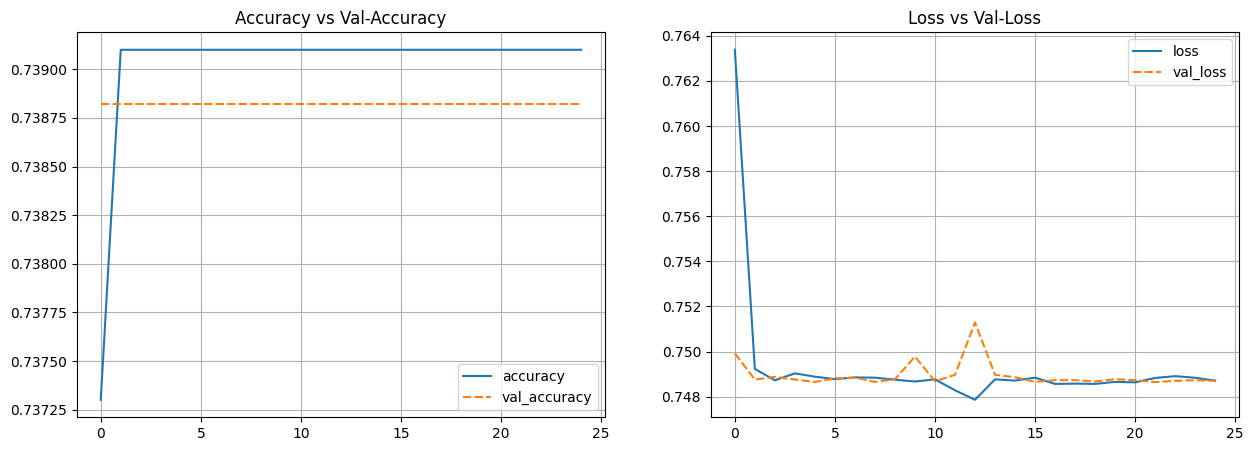

In [44]:
# Plot Training Results
model_lstm_1_hist_df = pd.DataFrame(model_base_lstm_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Pada visualisasi diatas dapat kita ambil kesimpulan bahwa:

1. **Accuracy dan Val-Accuracy:**
- Model tidak menunjukkan peningkatan akurasi setelah beberapa epoch pertama, baik pada data pelatihan maupun data validasi. 
- Tidak ada tanda-tanda overfitting karena akurasi pelatihan dan validasi sangat mirip, tetapi bisa jadi model mengalami underfitting, mengingat tidak ada peningkatan performa pada validasi.

2. **Loss dan Val Loss**
- Model berhasil meminimalkan loss baik pada pelatihan maupun validasi, tetapi setelah beberapa epoch pertama, tidak ada lagi penurunan signifikan dalam loss.
- Karena val-loss stabil dan tidak meningkat tajam, tidak ada tanda-tanda overfitting. Namun, fluktuasi kecil pada val-loss bisa mengindikasikan bahwa model mungkin tidak sepenuhnya mengeneralisasi dengan baik pada data validasi.

Disini saya melakukan prediksi pada data ```train``` dan ```val``` di model LSTM pertama agar nantinya pada improvement model tidak terjadi ```test leakage```.

In [45]:
# Model Evaluation of train-set
print('Train')
y_pred_baseline = np.argmax(model_base_lstm.predict(X_train), axis=-1)

print(classification_report(y_train, y_pred_baseline))

print ('-'* 60)
# Model Evaluation of test-set
print('Validation')
y_pred_baseline = np.argmax(model_base_lstm.predict(X_val), axis=-1)

print(classification_report(y_val, y_pred_baseline))

Train
226/226 [==============================] - 9s 37ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1156
           1       0.00      0.00      0.00       729
           2       0.74      1.00      0.85      5340

    accuracy                           0.74      7225
   macro avg       0.25      0.33      0.28      7225
weighted avg       0.55      0.74      0.63      7225

------------------------------------------------------------
Validation
40/40 [==============================] - 1s 37ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       204
           1       0.00      0.00      0.00       129
           2       0.74      1.00      0.85       942

    accuracy                           0.74      1275
   macro avg       0.25      0.33      0.28      1275
weighted avg       0.55      0.74      0.63      1275



Kita dapat melihat pada classification report untuk Train dan Val tidak dapat memprediksi sama sekali tiap kelas. Dapat kita asumsikan model base sebelum improvement ini **underfitting**.

# **Model Improvement**


Pada model improvement, saya akan menggunakan parameter ```Bidirectional``` karena dengan menambahkan parameter tersebut, model dapat mempelajari kata-kata dari dua arah, yaitu dari urutan sebelumnya (backward) dan urutan sesudahnya (forward). Hal ini memungkinkan model untuk memahami konteks secara lebih lengkap, baik dari kata-kata yang muncul sebelum maupun setelah kata yang sedang diprediksi.

Kemudian menambahkan fungsi ```dropout``` sebesar 0.1 untuk mencegah overfitting dengan cara menghapus secara acak sejumlah unit (neuron) pada layer selama proses pelatihan. Hal ini membantu model menjadi lebih general dan tidak terlalu bergantung pada neuron tertentu, sehingga meningkatkan kemampuan generalisasi ketika dihadapkan dengan data baru.

In [46]:
# Model Training using LSTM
%%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Penyusunan Model
model_lstm_2 = Sequential()

# Layer Text Vectorization
model_lstm_2.add(text_vectorization)

# Layer Embedding
model_lstm_2.add(embedding)

# Hidden Layer 1
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))

#add dropout
model_lstm_2.add(Dropout(0.1))

# Hidden Layer 2
model_lstm_2.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
# add dropout
model_lstm_2.add(Dropout(0.1))

# Hidden Layer 3
model_lstm_2.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))) # Set return_sequences=False for the last LSTM layer
# add dropout
model_lstm_2.add(Dropout(0.1))

# Layer Output
model_lstm_2.add(Dense(3,activation='softmax'))

# Compile
model_lstm_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Summary
model_lstm_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1149)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1149, 128)         1720704   
                                                                 
 bidirectional (Bidirection  (None, 1149, 64)          41216     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 1149, 64)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 1149, 32)          10368     
 onal)                                                           
                                                        

# **Training Model Improvement**

Pada training disini saya menggunakan ephocs sebesar 30, agar nanti lebih terlihat pola dari accuracy, val, dan loss

In [47]:
#train model 2
model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe))

Epoch 1/30
226/226 [==============================] - 65s 247ms/step - loss: 0.5721 - accuracy: 0.7967 - val_loss: 0.4474 - val_accuracy: 0.8408
Epoch 2/30
226/226 [==============================] - 46s 202ms/step - loss: 0.3446 - accuracy: 0.8756 - val_loss: 0.4392 - val_accuracy: 0.8376
Epoch 3/30
226/226 [==============================] - 44s 194ms/step - loss: 0.2674 - accuracy: 0.9092 - val_loss: 0.4948 - val_accuracy: 0.8196
Epoch 4/30
226/226 [==============================] - 42s 184ms/step - loss: 0.2181 - accuracy: 0.9298 - val_loss: 0.5152 - val_accuracy: 0.8243
Epoch 5/30
226/226 [==============================] - 41s 181ms/step - loss: 0.1624 - accuracy: 0.9504 - val_loss: 0.5695 - val_accuracy: 0.8329
Epoch 6/30
226/226 [==============================] - 40s 177ms/step - loss: 0.1210 - accuracy: 0.9669 - val_loss: 0.6142 - val_accuracy: 0.8102
Epoch 7/30
226/226 [==============================] - 40s 177ms/step - loss: 0.0909 - accuracy: 0.9787 - val_loss: 0.7254 - val_ac

# **Model Evaluation After Improvement**

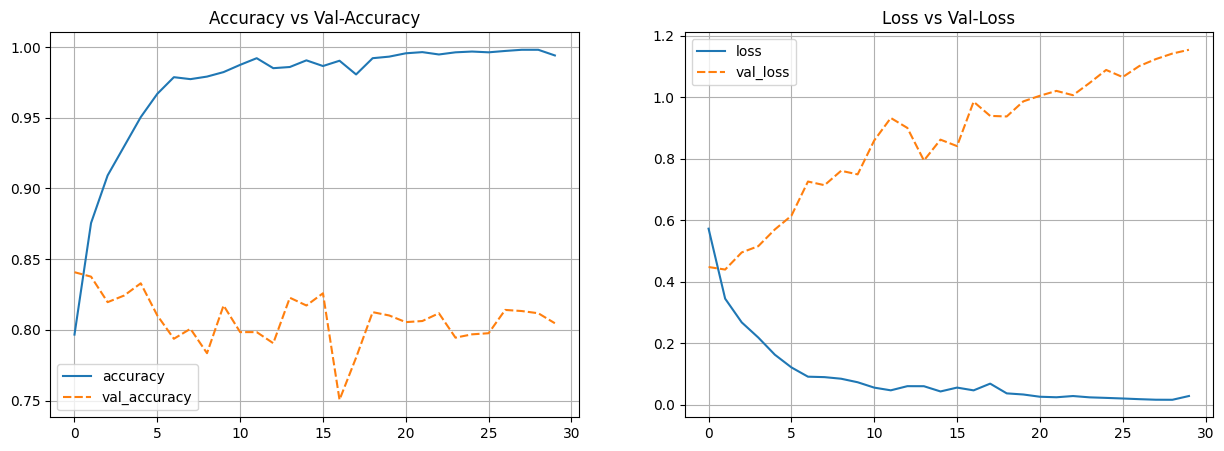

In [48]:
# Plot Training Results
model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari visualisasi diatas dapat kita simpulkan bahwa:
1. **Accuracy dan Val-Accuracy**
- Accuracy pada data train yang terus meningkat dari awal hingga mendekati 1 (100% accuracy) setelah sekitar 10 epoch dan kemudian stabil.
- Pada awalnya, akurasi validasi mendekati akurasi pelatihan, namun seiring berjalannya waktu, terjadi penurunan, fluktuasi, dan tidak pernah mencapai akurasi pelatihan. Ini menandakan bahwa model mengalami overfitting.  

2. **Loss vs Val-Loss**
- Nilai loss pada data train yang terus menurun mendekati nol, yang menandakan bahwa model belajar dengan baik pada data train.
- Data validasi yang terus meningkat seiring waktu, terutama setelah sekitar 5 epoch. Ini adalah tanda overfitting, di mana model belajar terlalu baik pada data pelatihan tetapi tidak generalisasi dengan baik pada data baru

Bisa kita simpulkan setelah dilakukan improvement model mengalami overfitting, karena perbedaan yang signifikan antara akurasi/loss pada pelatihan dan validasi.

In [49]:
# Model Evaluation of train-set
print('Train')
y_pred_improve = np.argmax(model_lstm_2.predict(X_train), axis=-1)

print(classification_report(y_train, y_pred_improve))

print ('-'* 60)
# Model Evaluation of test-set
print('Test')
y_pred_improve = np.argmax(model_lstm_2.predict(X_test), axis=-1)

print(classification_report(y_test, y_pred_improve))

Train
226/226 [==============================] - 18s 73ms/step
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1156
           1       0.94      0.89      0.92       729
           2       0.98      1.00      0.99      5340

    accuracy                           0.98      7225
   macro avg       0.97      0.95      0.96      7225
weighted avg       0.98      0.98      0.98      7225

------------------------------------------------------------
Test
47/47 [==============================] - 3s 70ms/step
              precision    recall  f1-score   support

           0       0.77      0.40      0.53       240
           1       0.40      0.38      0.39       151
           2       0.87      0.97      0.92      1109

    accuracy                           0.82      1500
   macro avg       0.68      0.59      0.61      1500
weighted avg       0.81      0.82      0.80      1500



Dari classification report juga kita dapat melihat gap accuracy yang sangat jauh, pada data train 98% kemudian pada data test sebesar 82%. Menandakan model overfitting.

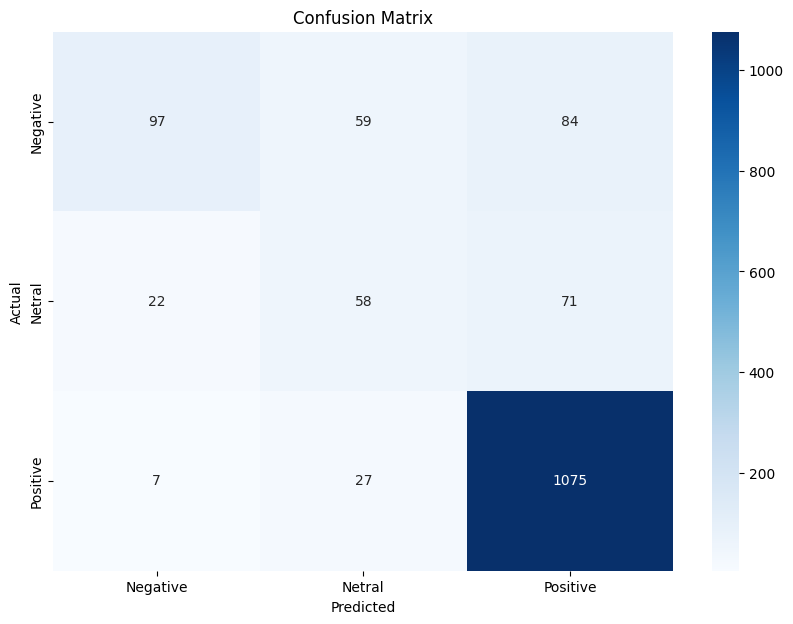

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred_improve)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Netral', 'Positive'], yticklabels=['Negative', 'Netral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **False Prediction Characteristic**

Pada tahap ini saya mencoba membuat dataframe baru dengan menambahkan hasil error prediksi dari tiap kelasnya.

In [51]:
# Pembuatan DF Act vs Pred
act_pred_improve = pd.DataFrame({
    'actual': y_test,
    'prediction': np.ndarray.flatten(y_pred_improve)
})
df_act_pred_improve = pd.concat([pd.DataFrame(X_test), act_pred_improve], axis=1)

# Definisikan fungsi error_class_0
def error_class_0(row):
    actual = row['actual']
    prediction = row['prediction']
    if actual == prediction:
        if prediction == 0:
            return "TP"
        elif prediction in [1, 2]:
            return "TN"
    else:
        if prediction == 0:
            return "FP"
        elif prediction in [1, 2]:
            return "FN"

# Definisikan fungsi error_class_1
def error_class_1(row):
    actual = row['actual']
    prediction = row['prediction']
    if actual == prediction:
        if prediction == 1:
            return "TP"
        elif prediction in [0, 2]:
            return "TN"
    else:
        if prediction == 1:
            return "FP"
        elif prediction in [0, 2]:
            return "FN"

# Definisikan fungsi error_class_2
def error_class_2(row):
    actual = row['actual']
    prediction = row['prediction']
    if actual == prediction:
        if prediction == 2:
            return "TP"
        elif prediction in [0, 1]:
            return "TN"
    else:
        if prediction == 2:
            return "FP"
        elif prediction in [0, 1]:
            return "FN"

# Tambahkan kolom error_class_0, error_class_1, dan error_class_2
df_act_pred_improve['error_class_0'] = df_act_pred_improve.apply(error_class_0, axis=1)
df_act_pred_improve['error_class_1'] = df_act_pred_improve.apply(error_class_1, axis=1)
df_act_pred_improve['error_class_2'] = df_act_pred_improve.apply(error_class_2, axis=1)

# Tampilkan hasil
df_act_pred_improve


,text_processed,actual,prediction,error_class_0,error_class_1,error_class_2
3853,best airline best check flight service excelle...,2,2,TN,TN,TP
62,premium premium leg room cramped crowded uncom...,1,1,TN,TP,TN
2875,always choose aisle seat singapore airline sta...,2,2,TN,TN,TP
6191,time get business class lounge board plane ser...,2,2,TN,TN,TP
8917,travelled last week first time airline heard g...,1,2,FN,FN,FP
...,...,...,...,...,...,...
4614,would thoroughly recommend singapore airline f...,2,2,TN,TN,TP
9098,expecting high level service heard much singap...,2,2,TN,TN,TP
2034,plan nice quiet good leg space actually comfor...,2,1,FN,FP,FN
1752,flight seat one best business class seat aircr...,2,2,TN,TN,TP


In [52]:
# Slicing untuk mengetahui karakteristik setiap kelas 0 saat actual = 0
df_act_pred_improve[(df_act_pred_improve['error_class_0'] == 'FN') & (df_act_pred_improve['actual'] == 0)]

,text_processed,actual,prediction,error_class_0,error_class_1,error_class_2
6054,singapore airline used one best one worst app ...,0,2,FN,FN,FP
5768,seated next toilet alleric cleaning fluid staf...,0,1,FN,FP,FN
7368,flew singapore day christmas six friend went e...,0,2,FN,FN,FP
1004,incessant reminder wear mask pull nose asked s...,0,2,FN,FN,FP
6009,airbus inferior boeing dreamliner cramped seat...,0,1,FN,FP,FN
...,...,...,...,...,...,...
2281,using sia website like know given option selec...,0,2,FN,FN,FP
362,wheelchair person made wait till last board ov...,0,1,FN,FP,FN
140,booked premium economy seat november flight oc...,0,1,FN,FP,FN
607,flight delayed hr consequently missed connecti...,0,1,FN,FP,FN


Pada kelas **Negative** terdapat sebanyak 143 dalam menebak error, dimana yang seharusnya **Negative** tapi diprediksi oleh mesin adalah **Netral**. Hal ini kemungkinan karena isi pada **Netral** ulasan kebanyakan diawali dengan kata yang indikasinya negative lalu ke arah positive, hal tersebut kemungkinan menyebabkan model salah prediksi pada kelas ini.

In [53]:
# Slicing untuk mengetahui karakteristik setiap kelas 1 saat actual = 1
df_act_pred_improve[(df_act_pred_improve['error_class_1'] == 'FN') & (df_act_pred_improve['actual'] == 1)]

,text_processed,actual,prediction,error_class_0,error_class_1,error_class_2
8917,travelled last week first time airline heard g...,1,2,FN,FN,FP
8959,even though flight singapore fair flight home ...,1,0,FP,FN,FN
6312,full house check quick easy boarding despite h...,1,2,FN,FN,FP
8895,service polite professional although jacket re...,1,2,FN,FN,FP
649,recently singapore merged air india know poor ...,1,0,FP,FN,FN
...,...,...,...,...,...,...
7454,flight considered longest flight although retu...,1,2,FN,FN,FP
6290,tried airline first time check easy available ...,1,2,FN,FN,FP
7103,never flown singapore airline looking forward ...,1,2,FN,FN,FP
6271,quite pleased seat business came time sleep fe...,1,2,FN,FN,FP


Pada kelas **Netral**, ternyata karakteristik yang menjadi salah tebak ketika narasinya terdapat kata favorite yang keluar pada kelas **Positive** dan **Negative**. Contohnya seperti kata ``singapore`` , ```easy```, ```airline```.

In [54]:
# Slicing untuk mengetahui karakteristik setiap kelas 2 saat actual = 2
df_act_pred_improve[(df_act_pred_improve['error_class_2'] == 'FN') & (df_act_pred_improve['actual'] == 2)]

,text_processed,actual,prediction,error_class_0,error_class_1,error_class_2
8263,overall good except one tall stewardess bit ar...,2,1,FN,FP,FN
6871,airline fantastic business class flight attend...,2,1,FN,FP,FN
8087,also flight back really looking forward flight...,2,1,FN,FP,FN
322,paid extra get forward seating section economy...,2,0,FP,FN,FN
6985,looking forward flying singapore told travel c...,2,0,FP,FN,FN
9280,singapore cabin staff consistently awesome not...,2,1,FN,FP,FN
5880,standard comfortable seat service good minor f...,2,1,FN,FP,FN
228,personalised service get many airline nowadays...,2,1,FN,FP,FN
4482,like regular airline infact flight travel quit...,2,0,FP,FN,FN
3106,always loved flying singapore airline time rou...,2,1,FN,FP,FN


Pada kelas **Positive** terdapat kesalahan menebak 34 pada model ketika memprediksi, hal tersebut disebabkan oleh kata-kata pada kelas **Positive** dan **Netral** terdapat sedikit persamaan. Konteksnya seperti ketika netral, riviewer cenderung mengisi kata negative terlebih dahulu kemudian positivenya, sehingga memberi rating **Netral**, dalam artian kata-katanya dalam ulasan tersebut hampir menyerupai dari yang diisi pada riview **Positive**. Sehingga hal tersebut menjadi kesalahan model dalam mendeteksi.

# **Model Savings**

In [55]:
# Freeze parameter supaya tidak bisa di training lagi
model_lstm_2.trainable = False
# save model using keras
model_lstm_2.save('model_lstm_2.keras')

# **Conclusion**

1. Hasil Model Sebelum Improvement:
    - Hasil pada model yang dilakukan sebelum improvement ditemukan underfit, walaupun akurasi baik, namun tidak dapat mendeteksi sama sekali pada kelas *Negative* dan *Netral*
2. Hasil Setelah Model Improvement:  

    Karena ini multiclass, saya ingin melihat dari sudut pandang F1-score dan accuracy. Dalam model F1-score terbaik yang dapat diprediksi oleh model adalah kelas Positive, dimana pada testnya didapat 91% untuk F1-score, kemudian diikuti oleh kelas Negative, dimana F1-scorenya sebesar 59%. Terakhir metriks terburuk pada F1-score didapatkan pada kelas Netral yang hanya mendapatkan F1-Score sebesar 27%. Artinya model sangat baik mendeteksi pada kelas Positive namun sangat buruk ketika mendeteksi kelas Netral. Kemudian dari sudut pandang akurasi model meningkat dari yang sebelum improvement, menjadi 82%. Akan tetapi perlu improvement lebih lanjut karena model tersebut masih **overfit**.

2. Untuk hasil dari Exploratory Data Analysis untuk segi insight business untuk Singapore Airlines, melihat dari beberapa kata yang paling banyak muncul seperti:
    - Kata-kata utama seperti *flight, airline, service, seat, food, crew, staff, entertainment* menunjukkan bahwa topik yang paling sering dibahas berkaitan dengan aspek layanan inti dalam pengalaman penerbangan. Singapore airline dapat meningkatkan kualitas pelayanan mereka dari kata kunci tersebut untuk meningkatkan kepuasan pelanggan, contohnya dari segi kualitas makanan, pelayanan crew dan staff, fasilitas seat yang digunakan, dll.
    - Kata seat dan leg menunjukkan bahwa ulasan terkait ruang kaki dan kenyamanan kursi sering muncul. Ini adalah salah satu aspek yang berpotensi menjadi fokus peningkatan, terutama di kelas ekonomi, di mana penumpang mungkin mengeluhkan ruang kaki yang terbatas. Maskapai dapat fokus pada peningkatan pengalaman ini, terutama untuk penerbangan jarak jauh.
    - Kata *meal* dan *entertainment* muncul cukup sering, yang menunjukkan bahwa makanan dan hiburan di pesawat adalah aspek penting yang dinilai oleh pelanggan. Kemungkinan dapat ditingkatkan atau memberikan inovasi terkait pelayanan dari kata tersebut untuk meraih kepuasan pelanggan yang lebih baik lagi.

3. Kelebihan Model:
    - Memiliki akurasi diatas acceptable score yaitu 82% (sudah diata 70%) yang artinya model ini dapat mengklasifikasikan ulasan dengan baik
    - Dapat memprediksi kelas Positive dengan optimal

    Kekurangan Model:
    - Perlu improvement karena overfit, kurang akurat dalam memprediksi kelas *Netral* dan *Negative*
    - Waktu training yang masih lama ketika dilakukan training ulang

4. Model Improvement:
    - Penyeimbangan dan penambahan data, agar mendatkan target pada dataset seimbang. Model dapat memahami lebih baik ketika dataset lebih banyak dan seimbang.
    - Penggunaan Transfer learning untuk model improvement, agar waktu training lebih cepat dan penambahan dropout yang optimal

